In [12]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')
from src.db.db_handler import DBHandler

from functools import reduce

In [13]:
db = DBHandler()

In [14]:
df_estaciones = pd.DataFrame(db.get_table_data("estaciones"))
df_provincias = pd.DataFrame(db.get_table_data("provincias"))

In [15]:
variables_info = {
    "tmed": ("temperatura", "temperatura_historico"),
    "velmedia": ("viento", "viento_historico"),
    "prec": ("lluvia", "lluvia_historico"),
    "hrMedia": ("humedad", "humedad_historico")
}

In [16]:
dfs = []

for var, (elemento, tabla) in variables_info.items():

    fecha_inicial = db.get_earliest_historical_date(tabla)
    fecha_final = db.get_latest_historical_date(tabla)
    
    data = db.get_estaciones_historico(elemento, fecha_inicial, fecha_final)
    df_var = pd.DataFrame(data)
    
    df_var = df_var[['idema', 'fecha', var]]
    
    dfs.append(df_var)


In [17]:
df_merged_vars = reduce(lambda left, right: pd.merge(left, right, on=['idema', 'fecha'], how='outer'), dfs)

In [23]:
df_merged = df_merged_vars.merge(df_estaciones, on="idema", how="left")
df_merged = df_merged.merge(df_provincias, left_on="provincia_id", right_on="id", how="left", suffixes=("_est", "_prov"))
df_merged["prec"] = pd.to_numeric(df_merged["prec"], errors="coerce") 

df_merged = df_merged.sort_values("fecha")

df_merged.head()


,idema,fecha,tmed,velmedia,prec,hrMedia,nombre_est,provincia_id,latitud,longitud,altitud,id,nombre_prov,com_auto_id
0,0009X,2023-02-14,6.6,1.4,0.0,83,ALFORJA,43,41.2000,0.9500,406,43,Tarragona,9
35664,1010X,2023-02-14,9.8,0.8,0.0,56,BERA,31,43.2667,-1.6667,54,31,Navarra,15
531006,9975X,2023-02-14,NaN,NaN,NaN,78,RASQUERA,43,41.0000,0.6000,112,43,Tarragona,9
473719,9301X,2023-02-14,4.8,NaN,0.0,68,MONTEAGUDO,31,41.9500,-1.6833,410,31,Navarra,15
279199,4499X,2023-02-14,9.4,3.3,0.0,66,MONESTERIO,6,38.0667,-6.2667,771,6,Badajoz,11


In [24]:
variables = ["tmed", "velmedia", "prec", "hrMedia"]

In [ ]:
df_plot = df_merged[variables]

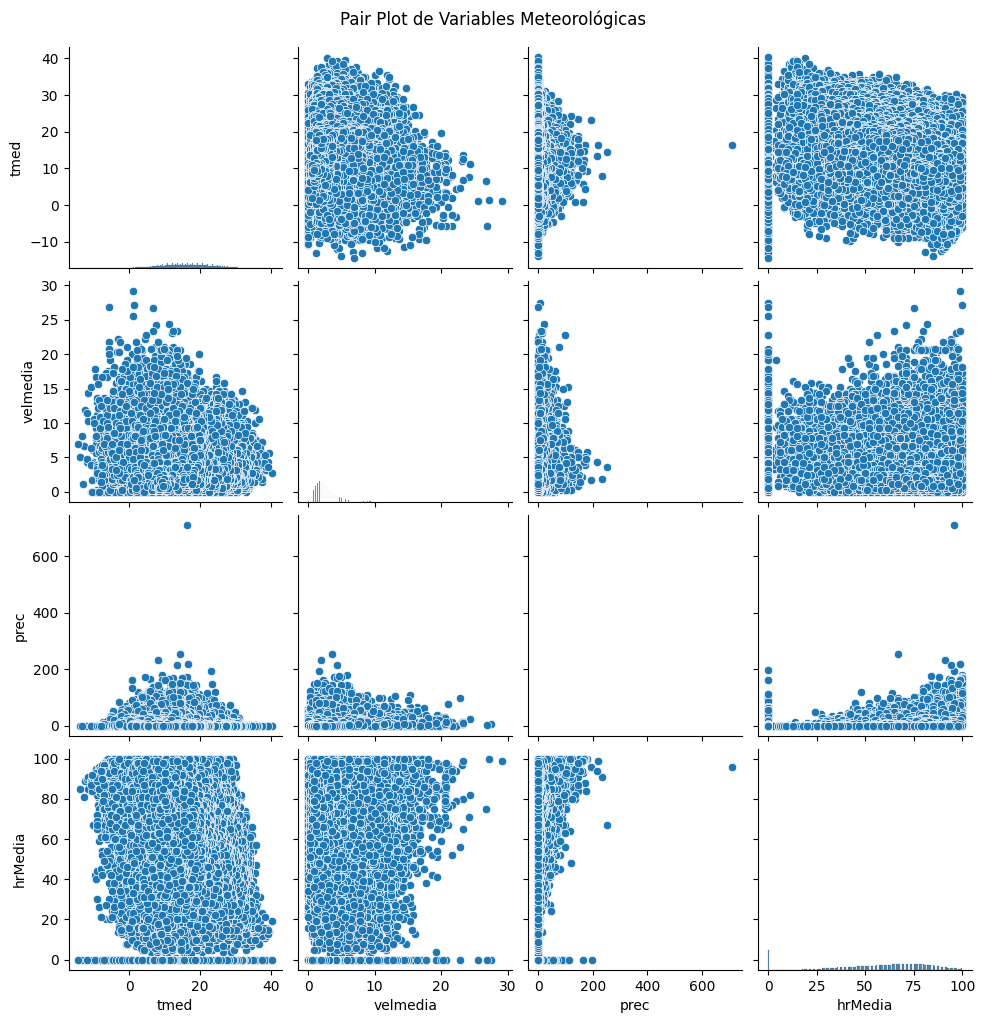

In [28]:
%matplotlib inline
sns.pairplot(df_plot)
plt.suptitle("Pair Plot de Variables Meteorológicas", y=1.02)
plt.show()